# Lab 8: Define and Solve an ML Problem of Your Choosing

In [40]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [41]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0) 

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The dataset I have chosen is the Book Review data set: bookReviewsData.csv.
2. I will be predicting whether a book review is positive or not. The label is the 'Positive Review' column.
3. This is a supervised learning classification problem. More specifically, it is a binary classification problem because a book review can either be positive or negative.
4. The feature in my dataset is the 'Review' column.
5. This is an important problem because it can inform the companies who sell these particular books on whether or not they should keep a certain book in their inventory. If certain books have a majority of negative reviews, then it would be pointless to keep the book in the inventory because having a book with a majority of negative reviews would not make a large profit. Additionally, it can be informative to predict whether a book review is positive or negative because the author or publishers of a book can understand how to improve the storyline, grammar, etc. of a future book. Knowing which books have positive or negative reviews is also important because it can help determine which genre (romance, thriller, mystery) of books are trending with positive reviews, benefiting companies who make a profit from selling books to customers. Also knowing which genre of books is trenidng among consumers can be helpful for book authors or publishers to write books in the trending genere, and therefore, make a profit. Furthermore, this dataset would be useful to determine how well a publishing company is doing, compared to its competitors. If a competitor is doing better, than the publishing company can take steps to improve their books. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [42]:
print(df.shape)
print(df.columns)
df.head(n=10)

(1973, 2)
Index(['Review', 'Positive Review'], dtype='object')


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [43]:
df.iloc[0,0] #to read a sample review

"This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot\n"

In [44]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Response:

Note: The final TfidfVectorizer arguments, neural network layers, and nerual network arugments that you will see in this notebook are the configurations that produced the best accuracy and loss scores for the training, validation, and test sets. 

1. I will not have a new feature list in the original dataframe "df." I will also not be removing any columns from the dataset in the original dataframe. However, I will be using TF-IDF which transforms the features into numerical vectors, where each unique token (word) in the corpus represents a new feature. If I were to create a new dataframe that displayed the vectors into a TF-IDF matrix, then each column, or feature, would be a unique word in the vocabulary of the corpus and each row would be the document, or in this dataset, each product review. TF-IDF vectorization is used to determine how frequently a word (or token) appears in a document relative to a collection of documents. TF-IDF recognizes the words that are the most unique to a document and uses those unique words to represent the characteristics of that document. This way, TF-IDF can identify whether a review is positive or negative, based on specific words such as "very good" or "very bad." Although I think the price of a book could also be useful in predicting whether a book review is positive or negative, it is not included in this dataset. 

2. To perform the data preperation step, I will first check for missing feature values, in case there was an error in gathering the data or data processing. If there is a missing value, then I will either fill in the missing values with a string such as "unavailable," as done with previous categorical variables, or would remove the example completely if they will not negatively affect the results produced by the machine learning model. Then, I will perform data cleaning and preprocessing by removing stop words, converting each word into lowercase letters, performing tokenization, and parsing text into meaningful groupings of words by producing n-grams, including both unigrams and bigrams. One reason why these preprocessing steps are important is because the goal of NLP, in general, is to reduce the size of the original text in its entirety because it can be high-dimensional and computationally expensive to process. Then, the next step is to convert the raw text into numerical representations for the machine learning model to understand. Thus, I would perform vectorization, more specifically TF-IDF (term frequency-inverse document frequency) vectorization. TF-IDF calculates how frequently (or how relevant) a word (or token) is in a document relative to acollection of documents. After the data has been converted into TF-IDF vectors, then the next thing I will do is prepare for the data modeling phase of the machine learning cycle.

3. The model that I will be using is a neural network. The reason why I want to use a neural network model is becuase they are good at solving complex problems such as NLP sentiment analysis. Rather than using a linear function such as logistic regression, which uses the sum of the features and their asscoiated weights to predict the label, neural networks use an activation function on all of the summations of the features multiplied by their weights to analyze non-linear relationships. A neural network is a good choice for modeling the dataset that I chose because it can handle large datasets with a large number of input features, which is beneficial for more complex weighted functions. Since the vocabulary of a TF-IDF contains a lot of tokens (words) neural networks, can handle this large amount of an input because each word in the corpus represents a feature value.

4. I will split the data into a training set and a test set, where 25% of the data will be a part of the test set. Then I will transform the features into numerical vectors using
TfidfVectorizer. I will create a TfidfVectorizer object with the parameters stop_words='english'and ngram_range=(1, 2) to specify that I want to remove the stop words from a pre-defined list and include individual words plus a combination of two individual words ("very bad") into my feature list. The good news is that the default for lowercase is true and min_df is 1. Then, I will fit the vectorizer to the training data, and transform the training and test datasets into numerical vectors. After, I will create my neural network model with an input layer, three hidden layers, and an output layer. The input layer will have an input shape (number of nodes) that corresponds to the vocabulary size of the corpus. The three hidden layers will have 64, 32, and 16 units nodes, respectively, and each layer will utilize the ReLU activation. However, the output layer will have 1 unit (node) and use the sigmoid activation function which maps the output to a probability between 0 and 1, since it is a binary classification problem. Then I will create a stochastic gradient descent optimizer with a learning rate of 0.1, create a binary cross entropy loss function, and will compile the model with the arguments of the stochastic gradient descent optimizer, loss function, and metric of accuracy to evaluate my model's performance. Then I will fit the neural network model to the training data by specifing the number of epochs, use 20% of the training to become the validation set, and use a custom logger function to output the loss and accuracy at the end of every 5 epochs. After fitting the model, I will print and display plots of the training and validation loss and accuracy every 5 epochs. After priniting and plotting the statistics, I will evaluate the model's performance by investigating the training and validation loss and accuracies to see if they show signs of overfitting or underfitting. Based on the data, I will decide whether I want to add Keras Dropout regularization layers after one or all hidden layers, or tweak the number of epochs to improve model's performance. Then, I will determine which num_epochs and Dropout layers cofigurations results in the lowest overfitting but produces the highest validation and training accuracy, as well as the lowest training and validation loss. After figuring out the best loss and accuracy scores by adding Dropout layers or changing the number of epochs, I will evaluate the model's performance on the test set. I will evaluate the accuracy and loss for the test set and examine a few examples (reviews) to see if the predictions my model made match the actual label. I will then experiment with the settings of the neural network and vectorizer to see if I need to change min_df, the learning rate, or add more layers to the neural network. By adjusting the settings of the TF-IDF vectorizer and neural network, I can determine which method produces the highest test accuracy, training accuracy, and validation accuracy without overfitting the data too much. I will also determine the TF-IDF vectorizer and neural network configurations that produce the lowest training, validation, and test loss, as well as find the settings that reduce the elapsed time. The final TfidfVectorizer arguments, neural network layers, and nerual network arugments that you will see in this notebook are the configurations that produced the best accuracy and loss scores for the training, validation, and test sets. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [46]:
#As seen there are no missing feature values
nan_count = np.sum(df.isnull(), axis = 0) 
nan_count

Review             0
Positive Review    0
dtype: int64

In [47]:
y = df['Positive Review'] 
X = df['Review']

X.shape

(1973,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [49]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [50]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

111028


In [51]:
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
             
# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                7105856   
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 7,108,481
Trainable params: 7,108,481
Non-trainable params: 0
_________________________________________________________________


In [52]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [53]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [54]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [55]:
#By default, Keras will output the loss and accuracy at the end of every epoch. 
#So instead, we will use a custom logger function to only output every 50 epochs.

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [56]:
t0 = time.time() # start time
num_epochs = 35 #epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs,
verbose=0, # disable the default progress bar
validation_split=0.2,
callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
)
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 35], Loss: 0.6933, Accuracy: 0.5114, Val_loss: 0.6929, Val_accuracy: 0.5101
Epoch [10/ 35], Loss: 0.6903, Accuracy: 0.5596, Val_loss: 0.6925, Val_accuracy: 0.5101
Epoch [15/ 35], Loss: 0.6684, Accuracy: 0.6509, Val_loss: 0.6821, Val_accuracy: 0.7635
Epoch [20/ 35], Loss: 0.5539, Accuracy: 0.7599, Val_loss: 0.6173, Val_accuracy: 0.6926
Epoch [25/ 35], Loss: 0.5161, Accuracy: 0.6957, Val_loss: 0.6058, Val_accuracy: 0.6351
Epoch [30/ 35], Loss: 0.3812, Accuracy: 0.8529, Val_loss: 0.7966, Val_accuracy: 0.5743
Epoch [35/ 35], Loss: 0.0185, Accuracy: 1.0000, Val_loss: 0.4456, Val_accuracy: 0.7804
Elapsed time: 16.53s


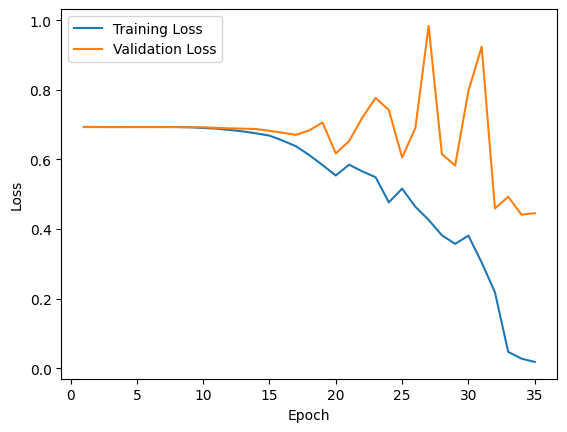

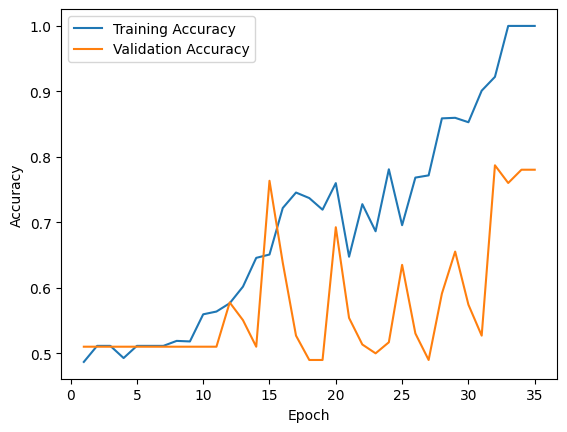

In [57]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate model performance on training and validation set:

Best configuration: num_epochs = 35, no dropout layers:

num_epochs = 30, no dropout layers: At 30/30 epochs, the training accuracy was 100% while the validation accuracy was around 80%. This indicates that the model is at that one point overfit. At 15/ 30 epochs and onwards, the training and validation accuracy were between 0.1-0.2 apart, where the training accuracy was greater. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.01 while the validation loss decreased from 0.7 to 0.4.

*num_epochs = 35, no dropout layers: At 30/35 epochs and onwards, the training accuracy was 100% while the validation accuracy was around 80%. This indicates that the model is overfit. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.01 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 55, no dropout layers: At 30/55 epochs and onwards, the training accuracy was 100% while the validation accuracy was around 80%. This indicates that the model is overfit. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.0013 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 55, one dropout layer (with 0.25 as an arguemt) added after the first hidden layer: At 35/55 epochs and onwards, the training and validation accuracy was 0.2 apart, where the training accuracy was 100% and the validation accuracy is around 77%. This indicates that the model is overfit. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.0029 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 55, two dropout layers (with 0.25 as an arguemt) added after the first two hidden layers: At 25/ 55 epochs and onwards, the training and validation accuracy was 0.3 apart. The training accuracy does not reach near 100% until 55/ 55 epochs and the validation accuracy was 77%. At every 5 epochs, the training loss decreases while the validation loss oscillates between 0.7 to 1.1813 until 55/55 epochs where the validation loss is 0.5. The training loss decreased from 0.7 to 0.0059 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 55, three dropout layers (with 0.25 as an arguemt) added after the three hidden layers: Although the training and validation scores are around the same at 55/55 epochs, the training accuracy score was 0.84 while the validation accuracy score was 0.71. There is slighlty less overfitting than some of the other comparisions with dropout layers because at 30/55 epochs, 45/55 epochs, and 55/55 epochs, the validation and accuracy scores were about 0.1 apart. From 5/55 epochs to 20/55 epochs, the training and validation accuracy were 0.02-0.05 apart. The training loss decreases every 5 epochs, while the validation loss oscillates from 0.7-0.9 until it ends at 0.4686 at 55/55 epochs. The training loss decreases from 0.7 to 0.6.

num_epochs = 55, one dropout layer (with 0.5 as an arguemt) added after the first hidden layer: The model still slightly overfits with at 50/55 epochs the training accuracy score was 100% while the validation accuracy was 70%. At 55/55 epochs, the training accuracy score was 100% while the validation accuracy was 80%. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.1 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 55, two dropout layers (with 0.5 as an arguemt) added after the first two hidden layers: The highest accuracy reached in the training set is: 0.8360. However, at 40/ 55 and onwards, the training and validation accuracies are 0.1 apart, so the overfitiing slightly improved from the original configurations. The training loss decreases after every 5 epochs while the validation loss does decrease, although it does oscillate a little to higher values at some epochs. The training loss decreased from 0.7 to 0.5 while the validation loss decreased from 0.7 to 0.6.

num_epochs = 55, three dropout layers (with 0.5 as an arguemt) added after all three hidden layers: The training accuracy does not reach 100%, the highest is 0.9070 at 55/55 epochs. At 35/55 epochs and onwards, the training and validation accuracies were between 0.2-0.4 apart. Training loss decreases after every 5 epochs, while validation loss stays the same.  The training loss decreased from 0.7 to 0.4 while the validation loss decreased from 0.7 to 0.6.

num_epochs = 35, one dropout layers (with 0.25 as an arguemt) added after the first hidden layer: The training and validation accuracy scores were mainly 0.1 apart, indicating less overfitting. However, at 35/35 epochs, the training accuracy score was 100% while the validation accuracy score was 80%. At every 5 epochs, the training and validation loss decreased. The training loss decreased from 0.7 to 0.0029 while the validation loss decreased from 0.7 to 0.4.

num_epochs = 35, two dropout layers (with 0.25 as an arguemt) added after the first two hidden layers: The highest the training accuracy score got was 0.7616. There was still overfitting because the training and validation accuracy scores were 0.2 apart. At every 5 epochs, the training loss decreased from 0.7 to 0.5 while the validation loss stayed the same at 0.7.

num_epochs = 35, one dropout layer (with 0.5 as an arguemt) added after the first hidden layer: The highest the training accuracy score gets is 0.8292. The model still overfits because the training and validation accuracy scores are 0.2 apart, where the training accuracy score was greater. The training loss decreased from 0.7 to 0.3 while the validation loss mostly stayed around 0.6-0.7 except for 35/35 epochs, where the validation loss was 1.0.

In [58]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8077
Loss:  0.4134550392627716 Accuracy:  0.807692289352417


In [59]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
print("Probability\t\t\tLabel")
print("")
for i in range(0,20):
    if probability_predictions[i] >= 0.5:
         print(str(probability_predictions[i]) + "\t\t\t" + str(y_test.to_numpy()[i]))

Predictions for the first 20 examples:
Probability			Label

[0.5326384]			False
[0.7904459]			True
[0.9035393]			True
[0.7661531]			True
[0.94219613]			True
[0.84051263]			True
[0.7076516]			True
[0.6591039]			False
[0.9746936]			True


In [60]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

Thriller and mystery readers like to guess along with our protagonists when we're reading a story.  We like to look for clues in what we've read to help us unravel the plot, and find out who did it and why the crime was done.

John Grisham cheats us out of that fun.  The villian of this book isn't introduced until there less than 75 pages left, which means that when you get that far, you realize that everything you read before then wasn't valid. To have some red herrings in a thriller is fine, but to have 300 pages of chases and red herrings?  That's bad.

Read another thriller instead of this one, one that plays by the rules


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [61]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

In [62]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [63]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

With astute attention to the details of character, setting and daily life, Susan Kelly illuminates the ordinary. Pondering love, memory, faith,and responsiblity, Kelly transforms the everyday into the quintessential. This is a beautifully rendered story


Prediction: Is this a good review? True

Actual: Is this a good review? True



Experiment with the vectorizer and neural network implementation:

Best configuration: num_epochs = 35, no dropout layers, ngram_range=(1,2), learning rate = 0.1, min_df = 1.

Where num_epochs = 35 and there are no dropout layers:

ngram_range=(1,1): The test accuracy stayed relatively the same, compared to ngram_range=(1,2) and min_df = 1. Instead of the test accuracy being 0.81 it became 0.8. Instead of the test loss being 0.4 it became 0.5. Furthermore, both the training and validation accuracies increase to 1.0 and 0.8, respectively. The training loss also decreased from 0.7 to 0.0046 and the validation loss decreased from 0.7 to 0.5 at the span of 35 epochs. Elapsed time was: 3.54s.

learning rate = 0.3 and ngram_range=(1,2): The test lost increased from 0.4 to 0.788680911064148 and the test accuracy decreased from 0.81 to 0.5182186365127563. Furthermore, the training loss decreases from 0.7 to 0.6 and the validation loss increases from 0.7 to 0.8 at the span of 35 epochs. The maximum training accuracy in the span of 35 epochs is 0.72 while the maximum validaion accuracy is 0.5. Elapsed time was: 13.48s.

learning rate = 0.5 and ngram_range=(1,2): The test loss increased from 0.4 to 0.6995081305503845 and the test accuracy decreased from 0.81 to 0.47975707054138184. Furthermore, the maximum training accuracy over the span of 35 epochs is 0.5 while the maximum validation accuracy was 0.5. Both training and validation loss over the span of 35 epochs was 0.7. Elapsed time was: 13.58s.

min_df = 1 and ngram_range=(1,2) (the default): The test accuracy was 0.81. The test loss being 0.4. Furthermore, both the training and validation accuracies increase to 1.0 and 0.8, respectively at the end of 35 epochs. The training loss also decreased from 0.7 to 0.0046 and the validation loss decreased from 0.7 to 0.4 at the span of 35 epochs.

min_df = 10 and ngram_range=(1,2): The test loss and accuracy scores are as follows: loss: 0.7235347628593445, Accuracy: 0.7753036618232727. The training accuracy goes up to 1 while the validation accuracy goes up to 0.73 at the span of 35 epochs. Furthermore, the training loss decreases from 0.7 to 0.0129 while the validation loss stays around 0.7 but slighlty increases to 0.77 towards the end of 35 epochs. Elapsed time was: 1.68s.

Add one more hidden layer with 8 units and relu function and gram_range=(1,2): The test loss and accuracy are as follows: Loss: 0.694369912147522, Accuracy: 0.47975707054138184
The training accuracy and validation accuracy are 0.5 at the span of 35 epochs. The training loss and validation loss stay at 0.7 at the span of 35 epochs. The elapsed time was: 14.72s.

As the learning rate increase, the elapsed time increases. When ngram_range=(1,1) increased to ngram_range=(1,2), elapsed time increased. When min_df increased, elapsed time decreased. When I added an additional hidden layer, the elapsed time significantly increased.